# SyriaTel Customer Churn Prediction Project


**Author**: [Dominic Muli](mailto:dominic.muli@student.moringaschool.com)

## 1.0) Project Overview


<img src="./images/syriatel-1.svg" alt="Syriatel" height="100">

Customer churn is a major problem for businesses, especially in the telecommunication industry, where customers can easily switch from one service provider to another. Customer churn refers to the loss of customers who stop using a company’s products or services. A high churn rate can have negative impacts on a company’s revenue, profitability, and growth.

SyriaTel is a company that provides mobile phone and data services. The company was established in 2000 and has its headquarters in Damascus, Syrian Arab Republic.SyriaTel operates in the US and Syrian Arab Republic. The company wants to reduce its customer churn rate and retain its loyal customers. To do this, the company needs to identify the factors that influence customer churn and predict which customers are likely to leave in the near future.

## 1.1) Business Problem

The problem statement for predicting customer churn at SyriaTel is as follows:

Given a set of customer data, develop a Python classifier model that can accurately predict which customers are likely to churn.

This model can be used by SyriaTel to identify customers at risk of churning and to implement interventions to prevent them from leaving

## 1.2) Objectives

* **Develop a Churn Prediction Model**: The primary objective is to create an accurate machine learning model that can predict customer churn at Syriatel based on historical data. This model should provide a reliable indication of which customers are likely to churn in the near future.

* **Identify Key Churn Drivers**: Determine the key factors and customer behaviors that contribute to churn. Understanding why customers leave is crucial for developing effective retention strategies.

* **Implement Proactive Customer Retention**: Utilize the model's predictions to implement proactive customer retention strategies. These strategies should be tailored to the specific needs and risk factors of individual customers.

* **Reduce Churn Rate**: Ultimately, the goal is to reduce the churn rate at SyriaTel. By effectively using the churn prediction model and implementing retention strategies, the company should be able to retain a higher percentage of its customer base.



## 1.3) Metric of Success

The project will be considered successful if below are achieved:

* **Prediction Accuracy**: The accuracy of the churn prediction model is a fundamental metric of success. This should be measured by assessing the model's ability to correctly classify customers as churners or non-churners. Common evaluation metrics include accuracy, precision, recall, and F1-score.

* **Feature Importance**: Understanding which features or variables are the most influential in predicting churn is crucial. Analyzing feature importance can help SyriaTel focus on the key drivers of customer churn.

* **Reduction in Churn Rate**: The success of the project should be reflected in a measurable reduction in the churn rate compared to the period before the model's implementation. A lower churn rate indicates that the proactive retention strategies are effective.

* **Model Scalability**: If the model proves successful, consider how easily it can be scaled to handle a larger volume of customers and data. Scalability is essential for long-term success.

* **Timely Implementation**: Evaluate how quickly the churn prediction model and associated retention strategies can be implemented to address customer churn issues in a timely manner.


## 1.4) Understanding Data


The data for this project will be obtained from [Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).
The dataset has the following variables:

* `state`: The state in which the customer lives.
* `account length`: The number of days the customer has had an account.
* `area code`: The area code of the customer's phone number.
* `phone number`: The customer's phone number.
* `international plan`: Whether or not the customer has an international calling plan.
* `voice mail plan`: Whether or not the customer has a voice mail plan.
* `number vmail messages`: The number of voicemail messages the customer has sent.
* `total day minutes`: The total number of minutes the customer has spent in calls during the day.
* `total day calls`: The total number of calls the customer has made during the day.
* `total day charge`: The total amount of money the customer was charged by the telecom company for calls during the day.
* `total eve minutes`: The total number of minutes the customer has spent in calls during the evening.
* `total eve calls`: The total number of calls the customer has made during the evening.
* `total eve charge`: The total amount of money the customer was charged by the telecom company for calls during the evening.
* `total night minutes`: The total number of minutes the customer has spent in calls during the night.
* `total night calls`: The total number of calls the customer has made during the night.
* `total night charge`: The total amount of money the customer was charged by the telecom company for calls during the night.
* `total intl minutes`: The total number of minutes the customer has spent in international calls.
* `total intl calls`: The total number of international calls the customer has made.
* `total intl charge`: The total amount of money the customer was charged by the telecom company for international calls.
* `customer service calls`: The number of calls the customer has made to customer service.
* `churn`: Whether or not the customer terminated their contract.


## 1.5) Data Relevance and Validation

The data available is relevant for the intended modelling.

## 2.0) Reading and Understanding the Data

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix, roc_curve,roc_auc_score,classification_report,confusion_matrix, ConfusionMatrixDisplay, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import ADASYN, SMOTE

In [2]:
# reading the data
data = pd.read_csv('./data/bigml_59c28831336c6604c800002a.csv')
# setting the maximum number of columns that will be displayed
pd.set_option('display.max_columns',21)
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
data.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


## 2.1) Data Cleaning

In [4]:
data.shape

(3333, 21)

In [5]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
# Renaming columns
data.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
data.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

In [8]:
data.describe(include = 'all')

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
count,3333,3333.000000,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,3333,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,337-4101,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,1,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [9]:
data.isnull().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

Observation: there are no missing values

In [10]:
data.duplicated().sum()

0

In [11]:
# Feature engineering

# Adding total calls and total minutes
data['total_calls'] = data['total_day_calls'] + data['total_eve_calls'] + data['total_night_calls'] \
    + data['total_intl_calls'] 
data['total_minutes'] = data['total_day_minutes'] + data['total_eve_minutes'] + data['total_night_minutes'] \
    + data['total_intl_minutes']

Observation: there are no duplicated records

## 2.2) Analysis

In [12]:
# Checking numeric variables
# Selecting all numeric columns (int and float)
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Getting the list of numeric column names
numeric_column_names = numeric_columns.columns.tolist()
numeric_column_names

['account_length',
 'area_code',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'customer_service_calls',
 'total_calls',
 'total_minutes']

In [13]:
# Checking categorical variables
# Selecting all non-numeric columns (object, bool)
non_numeric_columns = data.select_dtypes(include=['object','bool'])

# Getting the list of non-numeric columns names
non_numeric_column_names = non_numeric_columns.columns.tolist()
non_numeric_column_names

['state', 'phone_number', 'international_plan', 'voice_mail_plan', 'churn']

False    2850
True      483
Name: churn, dtype: int64


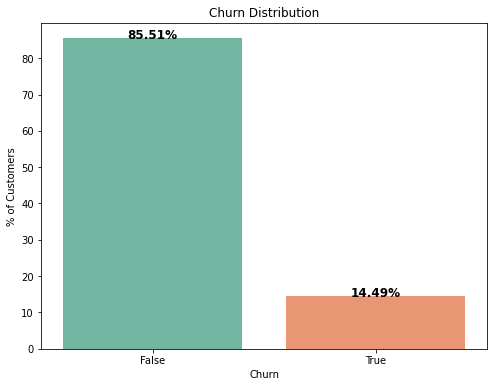

In [14]:
# Understanding churn feature

# Calculate and display churn value counts

churn_counts = data.churn.value_counts()
print(churn_counts)

# Calculate churn distribution as percentages
churn_perc = (churn_counts / len(data)) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=churn_perc.index, y=churn_perc, palette="Set2")
ax.set_xlabel('Churn')
ax.set_ylabel('% of Customers')
ax.set_title('Churn Distribution')

# Add percentage labels on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x() + width / 2, p.get_y() + height
    ax.annotate(f'{height:.2f}%', (x, y), ha='center', color='black', weight='bold', size=12)

plt.show()


Observation: The variables have outliers but for our model we will use the data as is without correcting for outliers to maintain robustness of the model and maintain distribution characteristics.

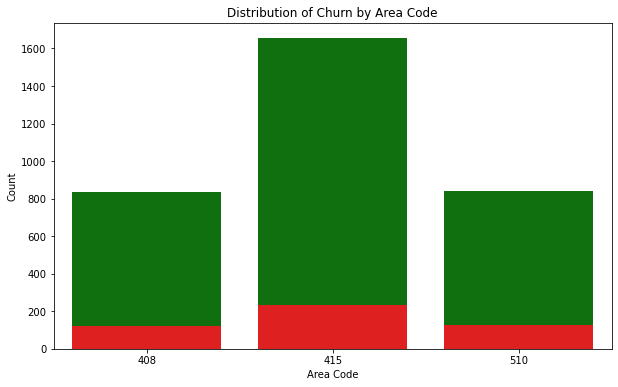

In [15]:
# Calculating the distribution of the "area code" feature for churned and non-churned customers

area_counts = data.groupby(['area_code', 'churn']).size().unstack()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=area_counts.index, y=area_counts[True], label='Churned', color='red')
sns.barplot(x=area_counts.index, y=area_counts[False], label='Not Churned', color='green', bottom=area_counts[True])
plt.title('Distribution of Churn by Area Code')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.show()


Observation: customer churn is a consistent across all three area codes. Area code 415 has the highest number of customers but still churns the same rate as the other two area codes.

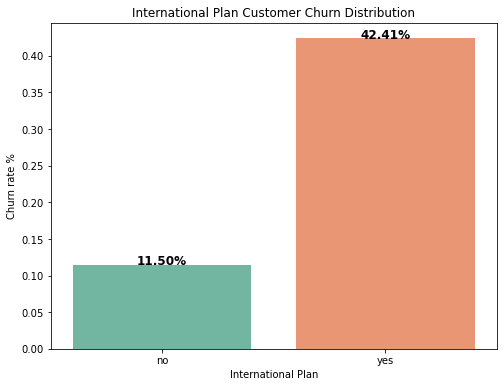

In [16]:
# Calculating the distribution of the "international_plan" feature for churned and non-churned customers

intn_plan_churn = data.groupby(['international_plan'])['churn'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=intn_plan_churn.index, y=intn_plan_churn, palette="Set2")
ax.set_xlabel('International Plan')
ax.set_ylabel('Churn rate %')
ax.set_title('International Plan Customer Churn Distribution')

# Add percentage labels on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x() + width / 2, p.get_y() + height
    ax.annotate(f'{height * 100:.2f}%', (x, y), ha='center', color='black', weight='bold', size=12)

plt.show()

Observation: international plan customers have high churn rates of 42%

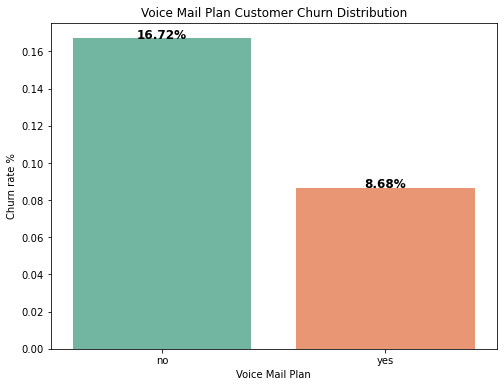

In [17]:
# Calculating the distribution of the "international_plan" feature for churned and non-churned customers

voice_m_plan_churn = data.groupby(['voice_mail_plan'])['churn'].mean()

# Creating a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=voice_m_plan_churn.index, y=voice_m_plan_churn, palette="Set2")
ax.set_xlabel('Voice Mail Plan')
ax.set_ylabel('Churn rate %')
ax.set_title('Voice Mail Plan Customer Churn Distribution')

# Adding percentage labels on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x() + width / 2, p.get_y() + height
    ax.annotate(f'{height * 100:.2f}%', (x, y), ha='center', color='black', weight='bold', size=12)

plt.show()

Observation: voice mail plan churn low

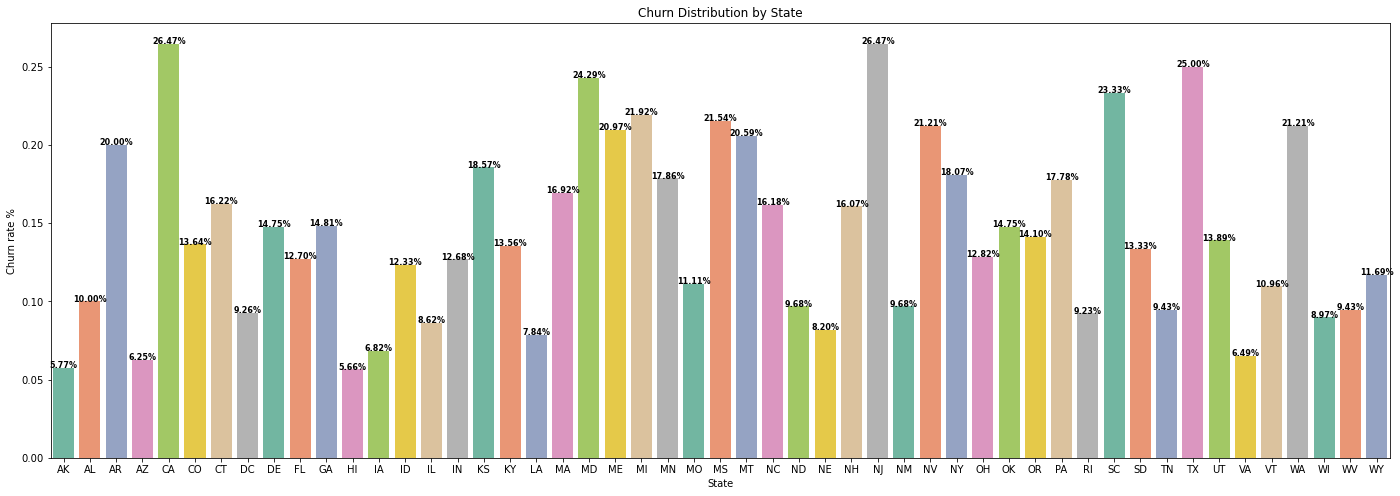

In [18]:
# Calculating the distribution of the "state" feature for churned and non-churned customers

state_churn = data.groupby(['state'])['churn'].mean()

# Creating a bar plot
plt.figure(figsize=(24, 8))
ax = sns.barplot(x=state_churn.index, y=state_churn, palette="Set2")
ax.set_xlabel('State')
ax.set_ylabel('Churn rate %')
ax.set_title('Churn Distribution by State')

# Adding percentage labels on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x() + width / 2, p.get_y() + height
    ax.annotate(f'{height * 100:.2f}%', (x, y), ha='center', color='black', weight='bold', size=8)

plt.show()

Observation: churn is almost the same in all states so has low to no impact

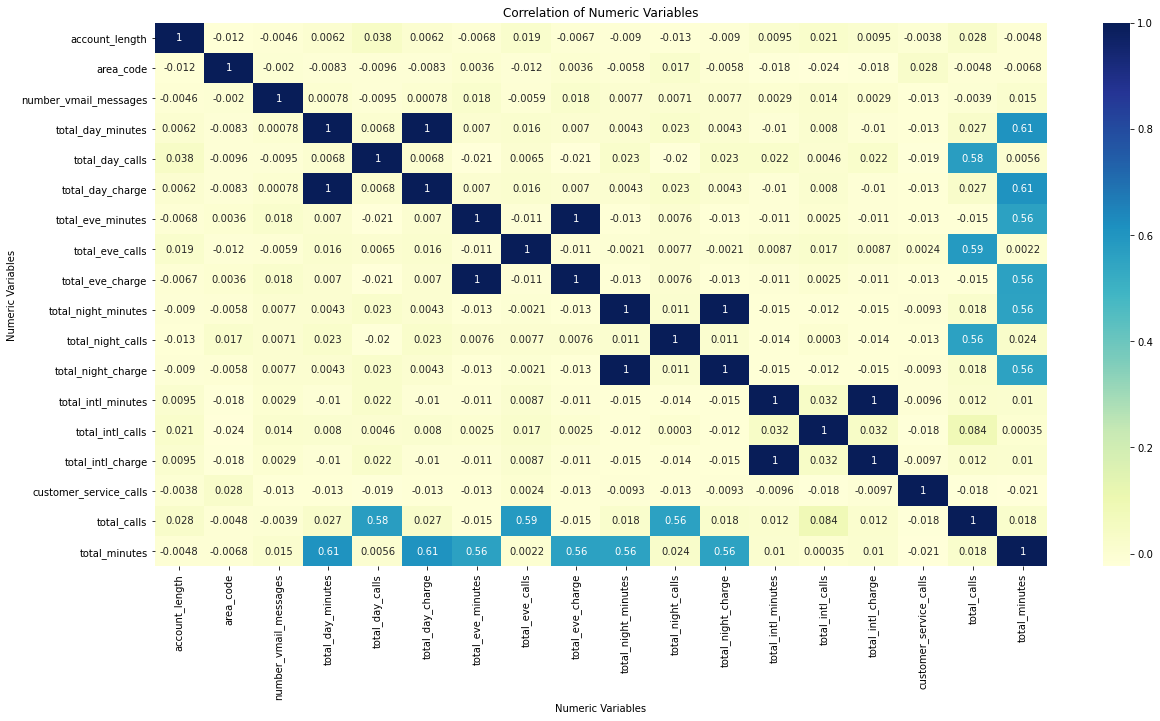

In [19]:
# Calculating the correlation matrix of Numeric features
correlation_matrix = data[numeric_column_names].corr()

# Creating a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

# Set labels and title
plt.xlabel("Numeric Variables")
plt.ylabel("Numeric Variables")
plt.title("Correlation of Numeric Variables")

# Showing the heatmap
plt.show()


observation: some features are highly correlated with correlation of 1 such as total_night_minutes and total_night_charge. This makes sense as charges are based on talk time. This implies multicollinearity. This has a little of impact on non-linear models.

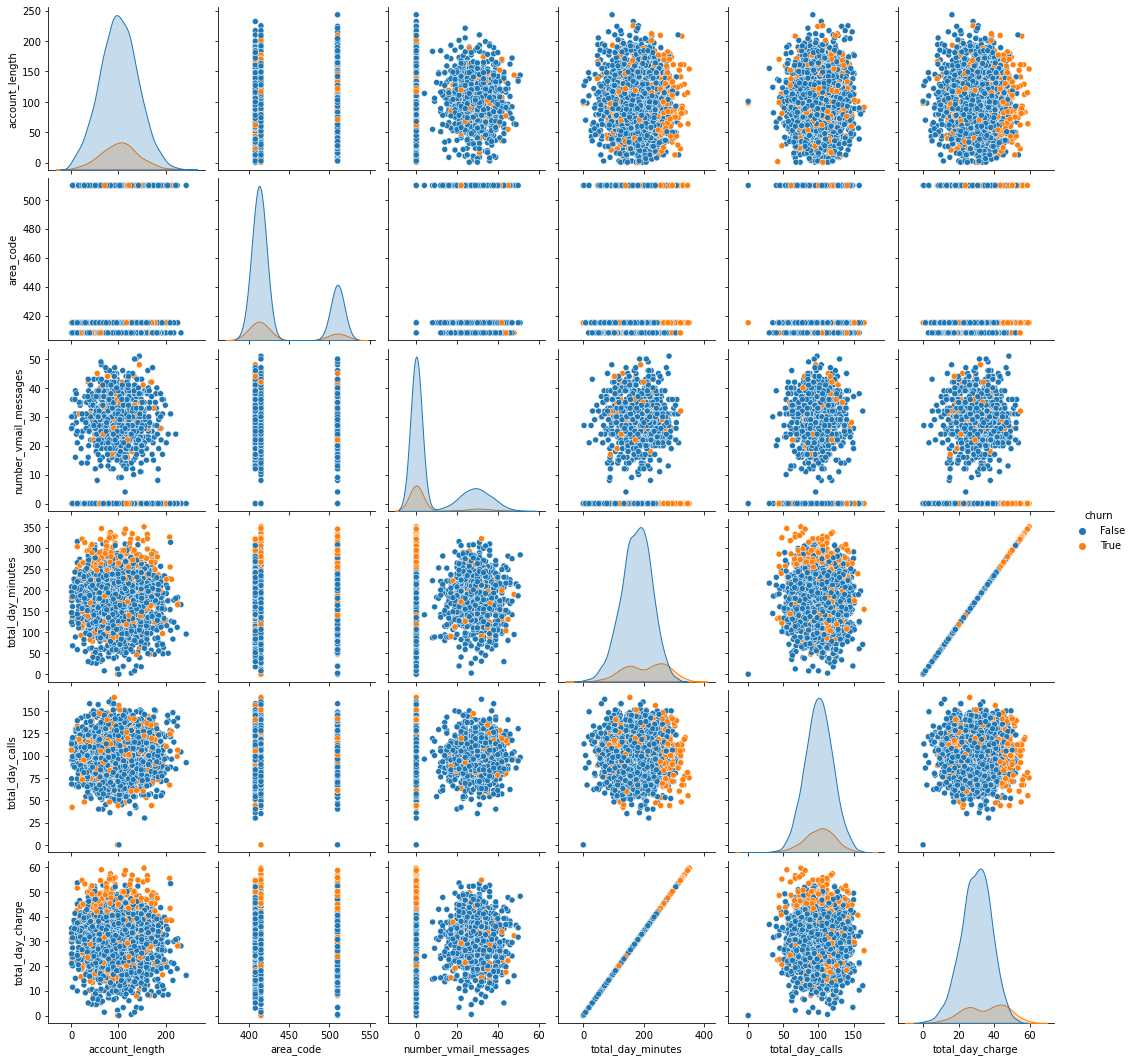

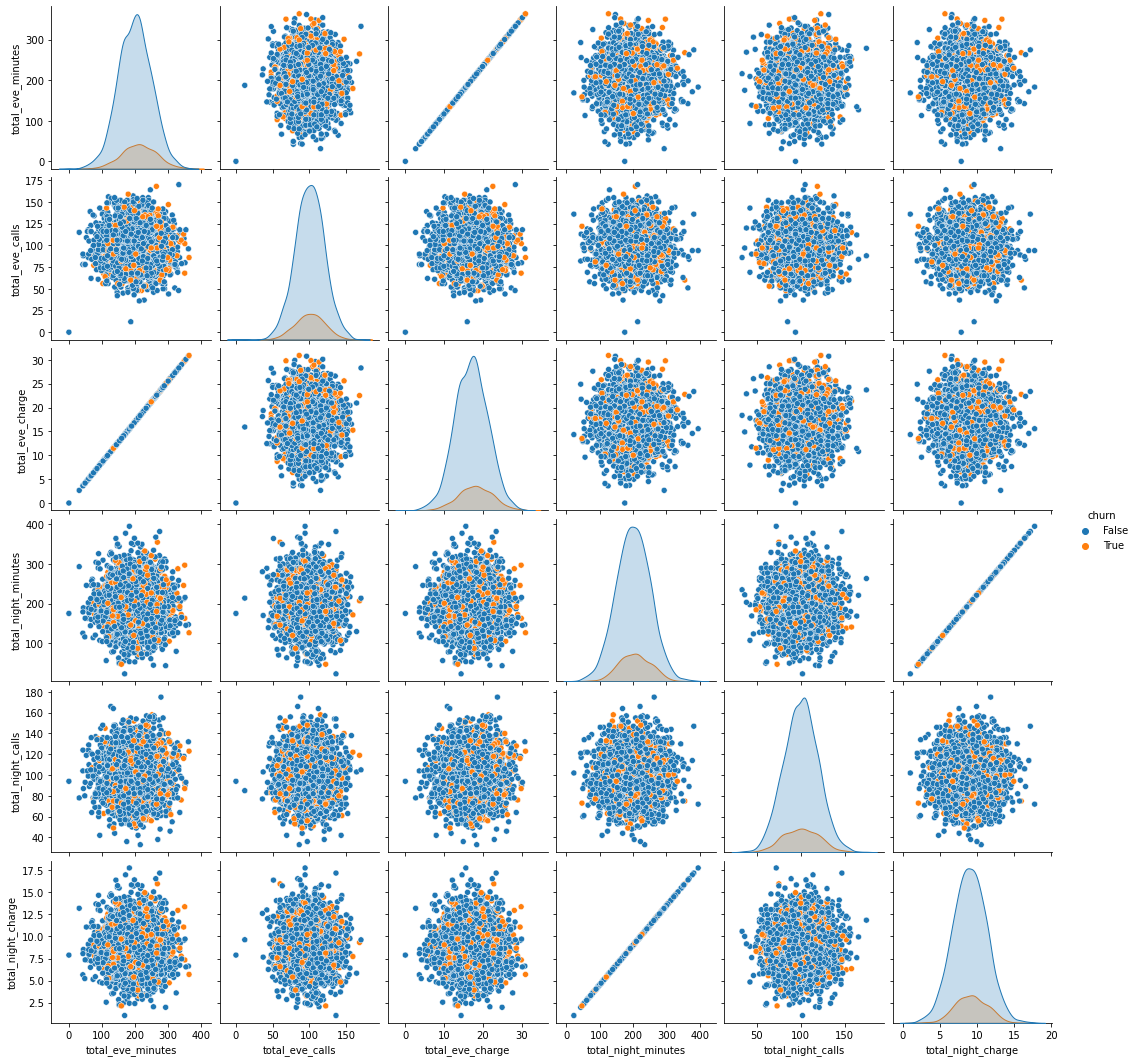

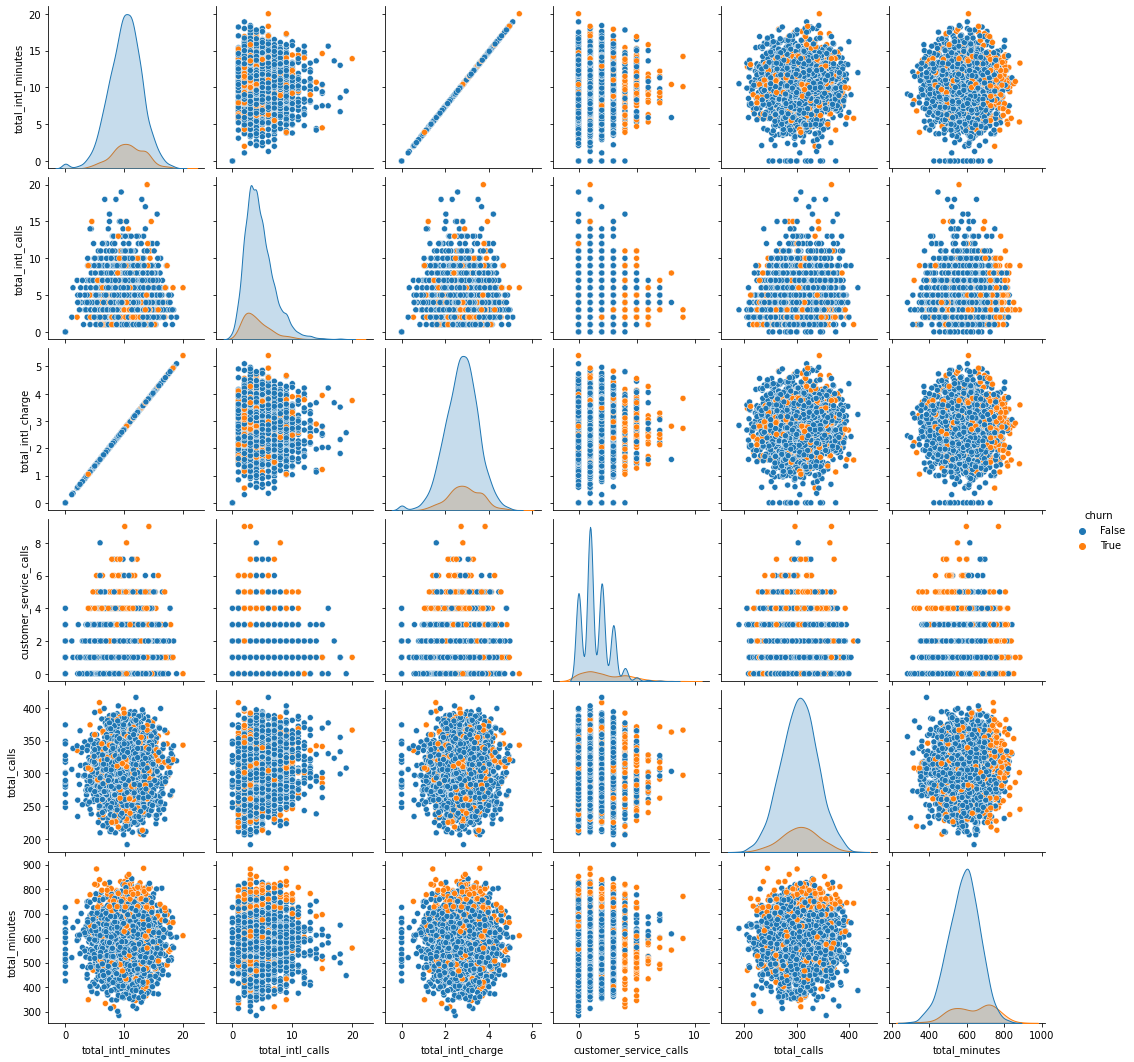

In [20]:
# Creating pair plots of numeric features

# variables to show in each pair plot
variables_per_plot = 6

# Spliting numeric_column_names into subsets for pair plots
subsets = [numeric_column_names[i:i + variables_per_plot] for i in range(0, len(numeric_column_names), variables_per_plot)]

# Create a pair plot for each subset
for subset in subsets:
    pair_plot = sns.pairplot(data, vars=subset, hue="churn", height=2.5)
    plt.show()


Observation: more customer service calls seem to lead to more customers leaving

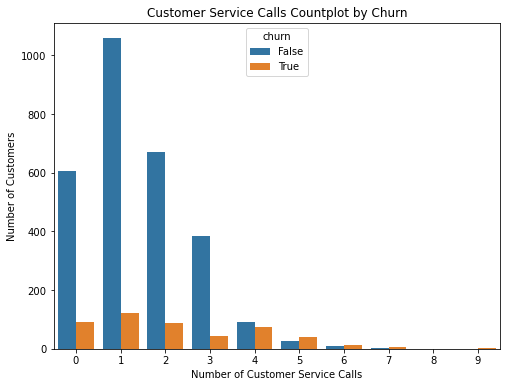

In [21]:
# Understanding customer service calls and churn

plt.figure(figsize=(8, 6))

sns.countplot(data=data, x='customer_service_calls', hue='churn')

# Set labels and title
plt.xlabel("Number of Customer Service Calls")
plt.ylabel("Number of Customers")
plt.title("Customer Service Calls Countplot by Churn")

# Showing the plot
plt.show()


Observation: customer service calls above 4 are leading to a higher churn rate

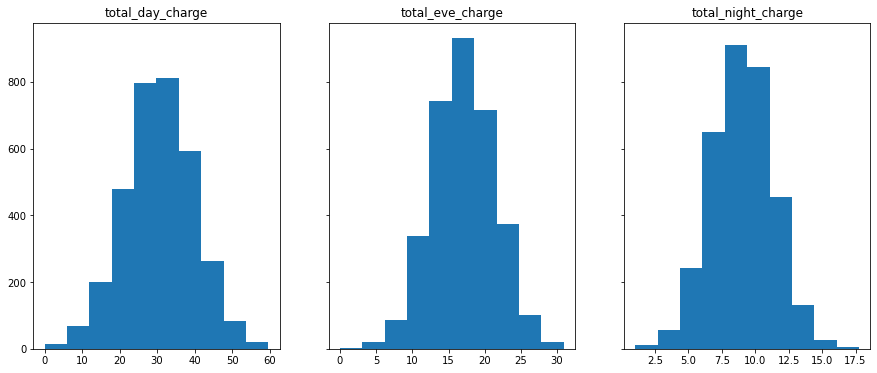

In [22]:
#Understanding service charges
columns_of_interest = ['total_day_charge', 'total_eve_charge', 'total_night_charge']

# Creating subplots with shared y-axis
fig, axs = plt.subplots(1, len(columns_of_interest), figsize=(15, 6), sharey=True)

# Creating histograms for each column
for i, column in enumerate(columns_of_interest):
    axs[i].hist(data[column])
    axs[i].set_title(column)

# Showing the histograms
plt.show()

Observation: the variables are normally distributed

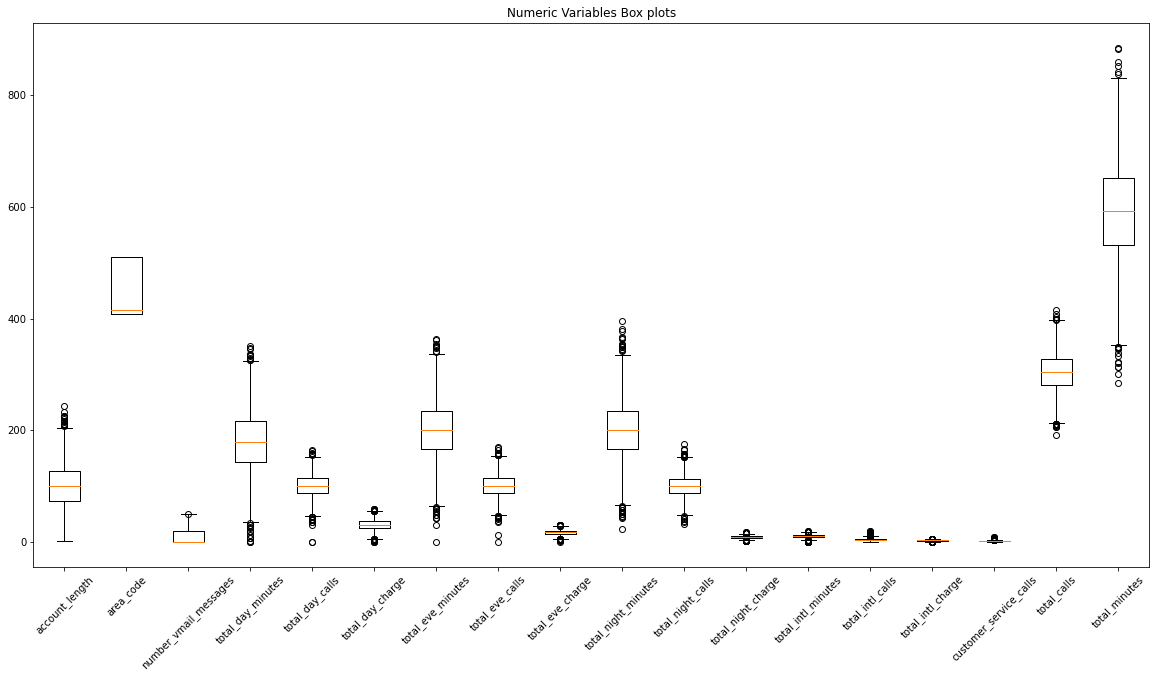

In [23]:
# Creating a box plot
plt.figure(figsize=(20, 10))
plt.boxplot(data[numeric_column_names].values, labels=numeric_column_names)
plt.title("Numeric Variables Box plots")

# Rotating x-axis labels for readability
plt.xticks(rotation=45)

# Showing the box plots
plt.show()


## 2.3) Building Models

### 2.3.1) Data preparation

In [24]:
# Dividing the data into features and target variable
X = data.drop(['churn', 'phone_number'], axis=1)
y = data['churn'] 


Phone number is dropped since it has many categories and is not relevant in the model. A phone number would most likely not determine whether a customer leaves or not.

In [25]:
predictors = list(X.columns)
predictors

['state',
 'account_length',
 'area_code',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'customer_service_calls',
 'total_calls',
 'total_minutes']

In [26]:
# Spliting the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,total_calls,total_minutes
438,WY,113,510,no,no,0,155.0,93,26.35,330.6,106,28.10,189.4,123,8.52,13.5,3,3.65,1,325,688.5
2674,IL,67,415,no,no,0,109.1,117,18.55,217.4,124,18.48,188.4,141,8.48,12.8,6,3.46,0,388,527.7
1345,SD,98,415,no,no,0,0.0,0,0.00,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4,219,333.5
1957,KY,147,408,no,no,0,212.8,79,36.18,204.1,91,17.35,156.2,113,7.03,10.2,2,2.75,1,285,583.3
2148,WY,96,408,no,no,0,144.0,102,24.48,224.7,73,19.10,227.7,91,10.25,10.0,7,2.70,1,273,606.4


In [28]:
# Preprocessing the data

# Checking and selecting categorical variables
obj_train_columns = X_train.select_dtypes(include=['object', 'bool']).drop('state', axis=1)
obj_train_list = obj_train_columns.columns.tolist()

# One-hot encoding 'state'
ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")

# Fitting and transforming on ohe on train data
train_state_encoded = ohe.fit_transform(X_train[["state"]])
# Creating custom column names for one-hot encoded feature
col_names = [f"state_{state}" for state in ohe.categories_[0]]
train_state_encoded = pd.DataFrame(train_state_encoded, index=X_train.index, columns=col_names)
X_train = pd.concat([X_train.drop("state", axis=1), train_state_encoded], axis=1)

# Transforming on test data
test_state_encoded = ohe.transform(X_test[["state"]])
test_state_encoded = pd.DataFrame(test_state_encoded, index=X_test.index, columns=col_names)
X_test = pd.concat([X_test.drop("state", axis=1), test_state_encoded], axis=1)

# One-hot encoding 'area_code'

# Fitting and transforming on ohe on train data
train_area_code_encoded = ohe.fit_transform(X_train[["area_code"]])
# Creating custom column names for one-hot encoded feature
col_names = [f"area_code_{code}" for code in ohe.categories_[0]]
train_area_code_encoded = pd.DataFrame(train_area_code_encoded, index=X_train.index, columns=col_names)
X_train = pd.concat([X_train.drop("area_code", axis=1), train_area_code_encoded], axis=1)

# Transforming on test data
test_area_code_encoded = ohe.transform(X_test[["area_code"]])
test_area_code_encoded = pd.DataFrame(test_area_code_encoded, index=X_test.index, columns=col_names)
X_test = pd.concat([X_test.drop("area_code", axis=1), test_area_code_encoded], axis=1)

# Label encoding for other categorical variables
label_encoders = {}
for feat in obj_train_list:
    le = LabelEncoder()
    X_train[feat] = le.fit_transform(X_train[feat])
    X_test[feat] = le.transform(X_test[feat])
    label_encoders[feat] = le

# Label encoding for target variable
y_encoder = LabelEncoder()
y_train = y_encoder.fit_transform(y_train)
y_test = y_encoder.transform(y_test)

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Creating a MinMaxScaler instance
scaler = MinMaxScaler()

# Geting the numeric columns of train data
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

# Scaling the numeric columns of train data
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

# Geting the numeric columns of test data
numeric_columns_test = X_test.select_dtypes(include=['int64', 'float64']).columns

# Scaling the numeric columns of test data
X_test[numeric_columns_test] = scaler.fit_transform(X_test[numeric_columns_test])

In [29]:
# Calculating the class distribution in the training set
unique, counts = np.unique(y_train, return_counts=True)
class_distribution_train = dict(zip(unique, counts))

print("Class Distribution in Training Set:")
for class_label, count in class_distribution_train.items():
    print(f"Class {class_label}: {count} samples")

# Calculating the class distribution in the testing set
unique, counts = np.unique(y_test, return_counts=True)
class_distribution_test = dict(zip(unique, counts))

print("\nClass Distribution in Testing Set:")
for class_label, count in class_distribution_test.items():
    print(f"Class {class_label}: {count} samples")

Class Distribution in Training Set:
Class 0: 2284 samples
Class 1: 382 samples

Class Distribution in Testing Set:
Class 0: 566 samples
Class 1: 101 samples


Observation: the data still has class imbalance. SMOTE technique should be applied to resolve the unbalanced response variable.

In [30]:
# Performing SMOTE

# Previous original class distribution
unique, counts = np.unique(y_train, return_counts=True)
class_distribution_train = dict(zip(unique, counts))

print("Class Distribution in Training Set:")
for class_label, count in class_distribution_train.items():
    print(f"Class {class_label}: {count} samples")

# Fit SMOTE to training data
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train) 

# Preview synthetic sample class distribution
print('\n')
unique, counts = np.unique(y_train_resampled, return_counts=True)
class_distribution_train_resampled = dict(zip(unique, counts))

print("Class Distribution in Resampled Training Set:")
for class_label, count in class_distribution_train_resampled.items():
    print(f"Class {class_label}: {count} samples") 


Class Distribution in Training Set:
Class 0: 2284 samples
Class 1: 382 samples


Class Distribution in Resampled Training Set:
Class 0: 2284 samples
Class 1: 2284 samples


Observation: SMOTE solves the class imbalance problem

### 2.3.2) Logistic Regression

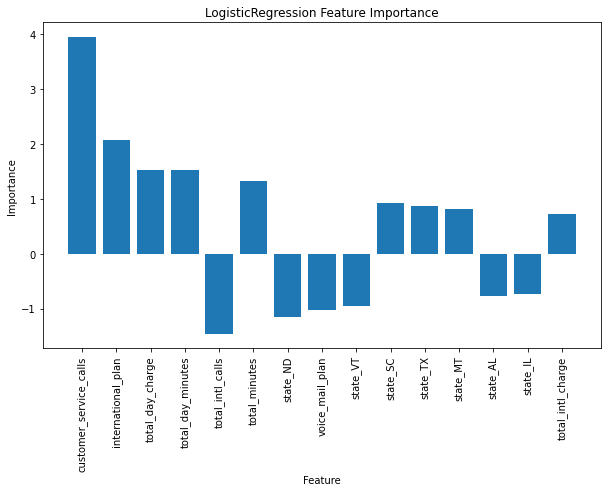

Mean Cross Validation Score: 86.23%


              precision    recall  f1-score   support

           0       0.88      0.96      0.92       566
           1       0.55      0.29      0.38       101

    accuracy                           0.86       667
   macro avg       0.71      0.62      0.65       667
weighted avg       0.83      0.86      0.84       667



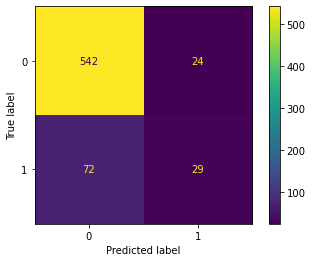

In [31]:
# Base Model with class imbalance

# Instantiating and fitting a LogisticRegression
logr = LogisticRegression()
logr.fit(X_train, y_train)

# Getting the coefficients of the features
feature_importance = logr.coef_[0]

# Creating a list of feature names
feature_names = X_train.columns

# Sorting the features by their importance
sorted_indices = np.argsort(np.abs(feature_importance))[::-1]
sorted_feature_importance = feature_importance[sorted_indices][0:15]
sorted_feature_names = feature_names[sorted_indices][0:15]

# Ploting the feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importance)), sorted_feature_importance)
plt.xticks(range(len(sorted_feature_importance)), sorted_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("LogisticRegression Feature Importance")
plt.show()


# Calculating cross-validation scores
logr_scores = cross_val_score(logr, X_train, y_train, cv=3)
mean_logr_score = np.mean(logr_scores)

print(f"Mean Cross Validation Score: {mean_logr_score:.2%}")
print("\n")

# Making predictions on the test data
y_pred = logr.predict(X_test)

# Calculating a classification report
classification_metrics = classification_report(y_test, y_pred)

# Printing the classification report
print(classification_metrics)

# ConfusionMatrixDisplay

confusion = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion)

disp.plot()


### 2.3.3) Decision Tree Classifier

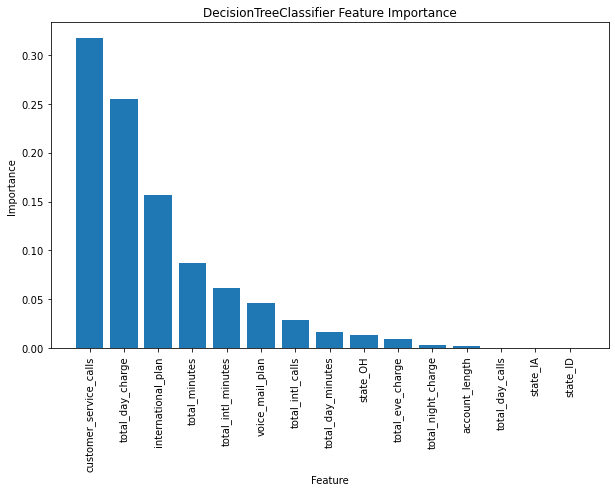

Mean Cross Validation Score: 85.88%


              precision    recall  f1-score   support

           0       0.98      0.48      0.64       566
           1       0.24      0.94      0.39       101

    accuracy                           0.55       667
   macro avg       0.61      0.71      0.51       667
weighted avg       0.87      0.55      0.60       667



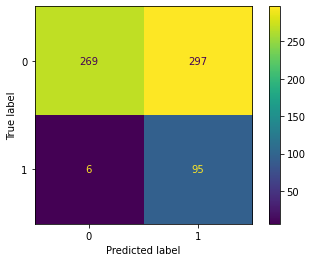

In [32]:

# Instantiating and fitting a DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5, random_state=42)
dtc.fit(X_train_resampled, y_train_resampled)

# Getting the feature importances
feature_importance = dtc.feature_importances_

# Creating a list of feature names
feature_names = X_train_resampled.columns

# Sorting the features by their importance
sorted_indices = feature_importance.argsort()[::-1]
sorted_feature_importance = feature_importance[sorted_indices][:15]
sorted_feature_names = feature_names[sorted_indices][:15]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importance)), sorted_feature_importance)
plt.xticks(range(len(sorted_feature_importance)), sorted_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("DecisionTreeClassifier Feature Importance")
plt.show()

# Calculating cross-validation scores
dtc_scores = cross_val_score(dtc, X_train_resampled, y_train_resampled, cv=3)
mean_dtc_score = np.mean(dtc_scores)

print(f"Mean Cross Validation Score: {mean_dtc_score:.2%}")
print("\n")

# Making predictions on the test data
y_pred = dtc.predict(X_test)

# Calculating a classification report
classification_metrics = classification_report(y_test, y_pred)

# Printing the classification report
print(classification_metrics)

# ConfusionMatrixDisplay

confusion = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion)

disp.plot()

### 2.3.4) Random Forest Classifier

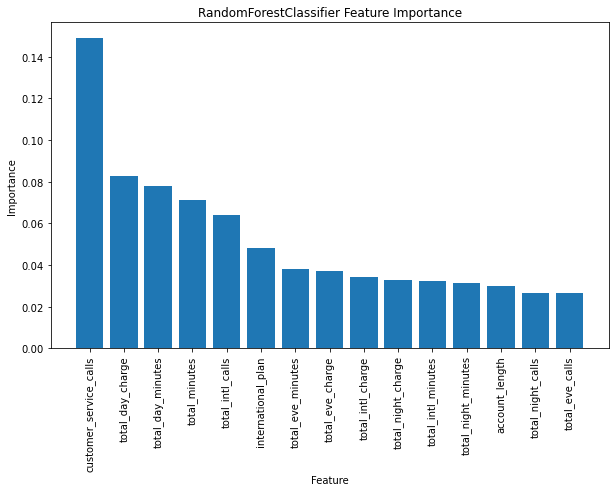

Mean Cross Validation Score: 93.85%


              precision    recall  f1-score   support

           0       0.96      0.84      0.90       566
           1       0.48      0.81      0.60       101

    accuracy                           0.84       667
   macro avg       0.72      0.83      0.75       667
weighted avg       0.89      0.84      0.85       667



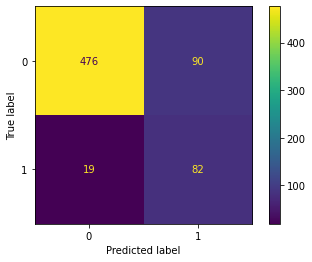

In [33]:
# Instantiating and fitting a RandomForestClassifier
rdmf = RandomForestClassifier(random_state=42)
rdmf.fit(X_train_resampled, y_train_resampled)

# Getting the feature importances
feature_importance = rdmf.feature_importances_

# Creating a list of feature names
feature_names = X_train_resampled.columns

# Sorting the features by their importance
sorted_indices = feature_importance.argsort()[::-1]
sorted_feature_importance = feature_importance[sorted_indices][:15]
sorted_feature_names = feature_names[sorted_indices][:15]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importance)), sorted_feature_importance)
plt.xticks(range(len(sorted_feature_importance)), sorted_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("RandomForestClassifier Feature Importance")
plt.show()

# Calculating cross-validation scores
rdmf_scores = cross_val_score(rdmf, X_train_resampled, y_train_resampled, cv=3)
mean_rdmf_score = np.mean(rdmf_scores)

print(f"Mean Cross Validation Score: {mean_rdmf_score:.2%}")
print("\n")

# Making predictions on the test data
y_pred = rdmf.predict(X_test)

# Calculating a classification report
classification_metrics = classification_report(y_test, y_pred)

# Printing the classification report
print(classification_metrics)

# ConfusionMatrixDisplay

confusion = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion)

disp.plot()

### 2.3.5) ROC model Comparison

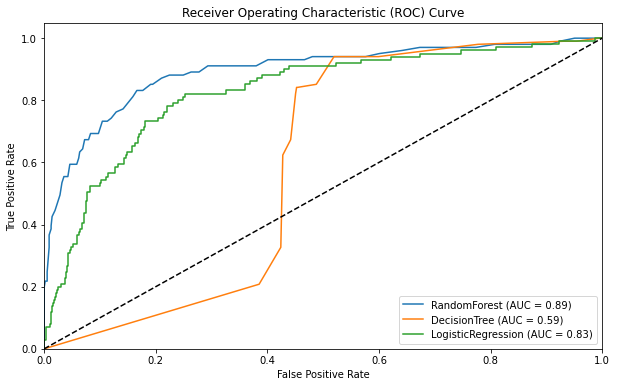

In [34]:
# ROC

# Making predictions
rf_probabilities = rdmf.predict_proba(X_test)[:, 1]
dt_probabilities = dtc.predict_proba(X_test)[:, 1]
lr_probabilities = logr.predict_proba(X_test)[:, 1]

# Computing ROC curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probabilities)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probabilities)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probabilities)

# Computing AUC
rf_auc = auc(rf_fpr, rf_tpr)
dt_auc = auc(dt_fpr, dt_tpr)
lr_auc = auc(lr_fpr, lr_tpr)

# Plotting ROC curves
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f'RandomForest (AUC = {rf_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'DecisionTree (AUC = {dt_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'LogisticRegression (AUC = {lr_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--') 

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Based on the AUC values, RandomForest is the best classifier, followed by LogisticRegression and DecisionTree. The RandomForest classifier has a very good AUC value of 0.90. This means that it is very good at distinguishing between positive and negative cases.

### 2.3.6) Grid Search CV Hyperparameter tuning for Random Forest

Best Paramenters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 500}
              precision    recall  f1-score   support

           0       0.97      0.83      0.90       566
           1       0.48      0.86      0.61       101

    accuracy                           0.84       667
   macro avg       0.72      0.85      0.76       667
weighted avg       0.90      0.84      0.85       667



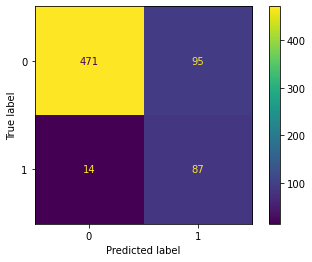

In [35]:
# Defining hyperparameters for the Random Forest Classifier
rdmf_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [5,10],
    "min_samples_split": [5, 15],
    "n_estimators": [100, 500],
}

# Instantiating and fitting a GridSearchCV for Decision Tree
rdmf_grid_search = GridSearchCV(rdmf, rdmf_param_grid, cv=3, return_train_score=True)
rdmf_grid_search.fit(X_train_resampled, y_train_resampled)

# You can access the best parameters:
best_params = rdmf_grid_search.best_params_
print(f"Best Paramenters: {best_params}")

# The best estimator
best_rdmf = rdmf_grid_search.best_estimator_

# Making predictions on the test data
y_pred = best_rdmf.predict(X_test)

# Calculating a classification report
classification_metrics = classification_report(y_test, y_pred)

# Printing the classification repor
print(classification_metrics)

# ConfusionMatrixDisplay
confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
disp.plot()

Observation: Grid Search improved the Random Forest marginally.

## 2.4) Conclusion

* TThe hyperparameter tuned random forest model is the best model for predicting customer churn, with a high recall of 0.84 for the negative class. However, the model has a lower recall of 0.83 for the positive class, meaning that 17% of actual churners are incorrectly predicted as non-churners.
* It is evident that high customer service calls are the largest contributor to high customer churn.
* Also, it can be observed that the factors including day munites and day charge leading to a higher bill are deterring the customer from continuing their phone plan.
* International plan customers were also seen to switch providers at a higher rate.


## 2.5) Recommendation

* Focus on reducing the number of customer service calls. This could be done by improving the customer experience, making it easier for customers to find the information they need, and resolving customer issues quickly and efficiently.
* Offer competitive pricing plans and data packages. This could help to reduce churn among customers who are leaving because they are unhappy with their bill.
* Target international plan customers with tailored retention programs. This could include offering discounts, promotions, or other benefits to encourage these customers to stay with the company.

In addition to these general recommendations, the company can also use the insights from the data to develop more targeted retention strategies for specific customer segments. For example, the company could offer customers who have made multiple customer service calls a free month of service or a discount on their next bill. The company could also offer customers who have high day minutes and day charge a data upgrade or a discount on a new phone.